## Introduction

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. Segmentation allows marketers to better tailor their marketing efforts to various audience subsets.

Customer segmentation requires a company to gather specific information about customers to analyze it to identify patterns that can be used to create segments.

## Problem Statement

Customer segmentation divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers, it also helps a business to modify its product based on its target customers from different types of customer segments.

In this project, unsupervised clustering methods will be adopted to the customer's records from a groceries firm's database. The target of this project is to perform clustering to summarize customer segments.

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import time
import sys
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython.display import Image
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns


#data preprocessing & modelling libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

## Data Loading

In [2]:
cust = pd.read_csv('/Users/bryton/Desktop/DataSets-main/marketing_campaign.csv', sep = '\t')

In [3]:
pd.set_option('max_columns', None)
pd.set_option('display.float_format', lambda x : '%.2f'%x)

In [4]:
cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.00,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.00,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.00,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.00,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.00,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### [Attribute Information](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
#### Customer Information  
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

11. MntWines: Amount spent on wine in last 2 years
12. MntFruits: Amount spent on fruits in last 2 years
13. MntMeatProducts: Amount spent on meat in last 2 years
14. MntFishProducts: Amount spent on fish in last 2 years
15. MntSweetProducts: Amount spent on sweets in last 2 years
16. MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

17. NumDealsPurchases: Number of purchases made with a discount
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

24. NumWebPurchases: Number of purchases made through the company’s website
25. NumCatalogPurchases: Number of purchases made using a catalogue
26. NumStorePurchases: Number of purchases made directly in stores
27. NumWebVisitsMonth: Number of visits to company’s website in the last month

#### Other
28.  Z_CostContact
29.  Z_Revenue  

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
cust.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
print(cust['Z_CostContact'].describe())
print()
print(cust['Z_Revenue'].describe())

count   2240.00
mean       3.00
std        0.00
min        3.00
25%        3.00
50%        3.00
75%        3.00
max        3.00
Name: Z_CostContact, dtype: float64

count   2240.00
mean      11.00
std        0.00
min       11.00
25%       11.00
50%       11.00
75%       11.00
max       11.00
Name: Z_Revenue, dtype: float64


In [8]:
education = pd.DataFrame(cust['Education'].value_counts())
marital = pd.DataFrame(cust['Marital_Status'].value_counts())

In [9]:
education

,Education
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


<AxesSubplot:ylabel='Education'>

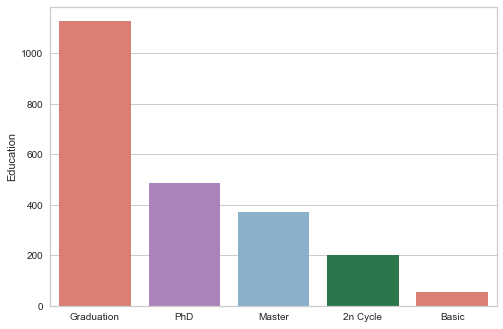

In [10]:
colors = ["#EC7063","#AF7AC5","#7FB3D5","#1E8449"]
sns.barplot(data = education, x = education.index, y = education['Education'], palette=colors)

In [11]:
marital

,Marital_Status
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


<AxesSubplot:ylabel='Marital_Status'>

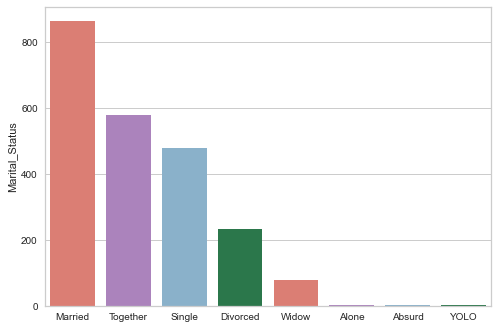

In [12]:
sns.barplot(data = marital, x = marital.index, y = marital['Marital_Status'], palette=colors)

### Note:
1. Income column has only 2216 non-null value, there are 24 records missing in this field.  The missing data has a proportion of 1.09% in the whole dataset.
2. Dt_Customer column has an object data type, it should be parsed into DateTime type.
3. 'Z_CostContact' and 'Z_Revenue' have only one unique value and the standard deviation is 0.
4. There are over 5 features in 'Education' and 'Marital_Status' column, which is too much and need to reduce for clustering.

## Data Preprocessing

### Data Cleaning

In [13]:
print(sum(cust.duplicated()))

0


There is no duplicated rows in the dataset

In [14]:
# parse 'Dt_Customer' into DateTime type
cust['Dt_Customer'] = pd.to_datetime(cust['Dt_Customer'])
print('The newest customer enrollment dateis ', max(cust['Dt_Customer']))
print('The oldest customer enrollment dateis ', min(cust['Dt_Customer']))

The newest customer enrollment dateis  2014-12-06 00:00:00
The oldest customer enrollment dateis  2012-01-08 00:00:00


In [15]:
# Drop missing records
cust.dropna(inplace=True)
print(len(cust))

2216


### Feature Engineering
In this step, feature engineering will be adopted to simplify the dataset.

1. Deriving Customer **'Age'** column from **'Year_Birth'**.
2. Updating **'Marital_Status'** feature as the living situation of couples.
3. Creating a feature **'Children'** to indicate total children in a household that is, including kids and teenagers.
4. To get further clarity of household, Creating feature indicating **'Family_Size'**
5. Creating a feature **'Is_Parent'** to indicate parenthood status.
6. Creating three categories in the **'Education'** by simplifying its value counts.
7. Renaming product names for clarity.
8. Creating **'Spent'** column (all expenses were summed).
9. Creating **'Accepted_Campaings'** column (all accepted campaigns summed).
10. Creating **'Total_Purchases'** column (all purchases from different channels summed).
11. Creating **'Day_Engaged'** feature which defines the number of days the customers started to shop in the store relative to the last recorded date.
12. Dropping some of the redundant features.

In [16]:
#age of customer
cust["Age"]= 2022-cust.Year_Birth

#Replacing the conflict values in marital status
cust['Marital_Status'] = cust['Marital_Status'].replace(['Married', 'Together'],'Partner')
cust['Marital_Status'] = cust['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

# #Feature indicating total children living in the household
cust["Children"]=cust["Kidhome"]+cust["Teenhome"]

# #Feature for total members in the household
cust["Family_Size"] = cust["Marital_Status"].replace({"Single": 1, "Partner":2})+ cust["Children"]

# #Feature pertaining parenthood
cust["Is_Parent"] = np.where(cust.Children> 0, 1, 0)

# #Segmenting education levels in three groups
cust["Education"]=cust["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# #For clarity
cust=cust.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Total spendings
cust["Spent"] = cust["Wines"]+ cust["Fruits"]+ cust["Meat"]+ cust["Fish"]+ cust["Sweets"]+ cust["Gold"]

#Total Accepted Campaigns
cust['Accepted_Campaigns'] = cust['AcceptedCmp1'] + cust['AcceptedCmp2'] + cust['AcceptedCmp3'] + cust['AcceptedCmp4'] + cust['AcceptedCmp5']

#Number of Total Purchases
cust['Total_Purchases'] = cust['NumWebPurchases'] + cust['NumCatalogPurchases'] + cust['NumStorePurchases'] + cust['NumDealsPurchases']

In [17]:
dates = []
for i in cust["Dt_Customer"]:
    i = i.date()
    dates.append(i)  

days = []
d1 = datetime.date.today()
for i in dates:
    delta = d1 - i
    days.append(delta)
cust["Day_Engaged"] = days
# data['Day_engaged'] = (data['First_day'] - data['Dt_Customer']).dt.days
cust["Day_Engaged"] = cust["Day_Engaged"].dt.days

In [18]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   Wines                2216 non-null   int64         
 10  Fruits               2216 non-null   int64         
 11  Meat                 2216 non-null   int64         
 12  Fish                 2216 non-null   int64         
 13  Sweets               2216 non-nul

In [19]:
#Dropping some of the redundant features
to_drop = ["Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
cust = cust.drop(to_drop, axis=1)

In [20]:
cust.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Children,Family_Size,Is_Parent,Spent,Accepted_Campaigns,Total_Purchases,Day_Engaged
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,52247.25,0.44,0.51,49.01,305.09,26.36,167.00,37.64,27.03,43.97,2.32,4.09,2.67,5.80,5.32,0.07,0.07,0.07,0.06,0.01,0.01,0.15,53.18,0.95,2.59,0.71,607.08,0.30,14.88,3370.01
std,25173.08,0.54,0.54,28.95,337.33,39.79,224.28,54.75,41.07,51.82,1.92,2.74,2.93,3.25,2.43,0.26,0.26,0.26,0.24,0.12,0.10,0.36,11.99,0.75,0.91,0.45,602.90,0.68,7.67,232.47
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.00,0.00,1.00,0.00,5.00,0.00,0.00,2858.00
25%,35303.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,2.00,0.00,69.00,0.00,8.00,3198.00
50%,51381.50,0.00,0.00,49.00,174.50,8.00,68.00,12.00,8.00,24.50,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,52.00,1.00,3.00,1.00,396.50,0.00,15.00,3371.00
75%,68522.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.00,1.00,3.00,1.00,1048.00,0.00,21.00,3544.00
max,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,129.00,3.00,5.00,1.00,2525.00,4.00,44.00,3921.00


In [21]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   Wines                2216 non-null   int64  
 7   Fruits               2216 non-null   int64  
 8   Meat                 2216 non-null   int64  
 9   Fish                 2216 non-null   int64  
 10  Sweets               2216 non-null   int64  
 11  Gold                 2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

### Outlier handling

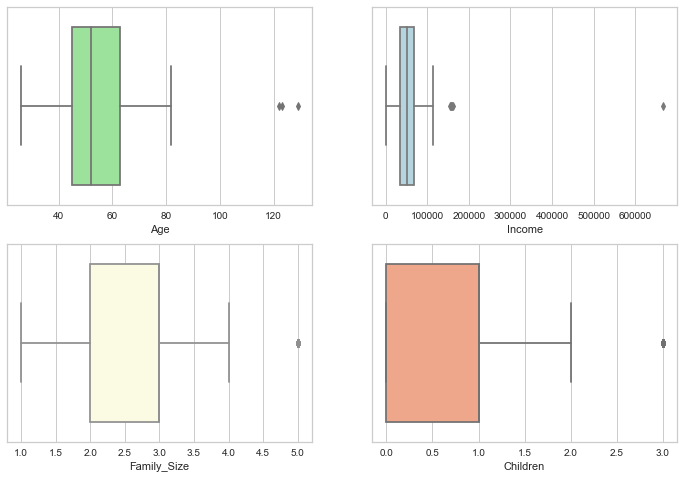

In [22]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(cust['Age'], color='lightgreen')
plt.subplot(2,2,2)
sns.boxplot(cust['Income'], color='lightblue')
plt.subplot(2,2,3)
sns.boxplot(cust['Family_Size'], color='lightyellow')
plt.subplot(2,2,4)
sns.boxplot(cust['Children'], color='lightsalmon')
plt.show()

Note that max-age is 129 years, As I calculated the age that would be today (i.e. 2022). There are some outliers need to dealt with in income column.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 576x396 with 0 Axes>

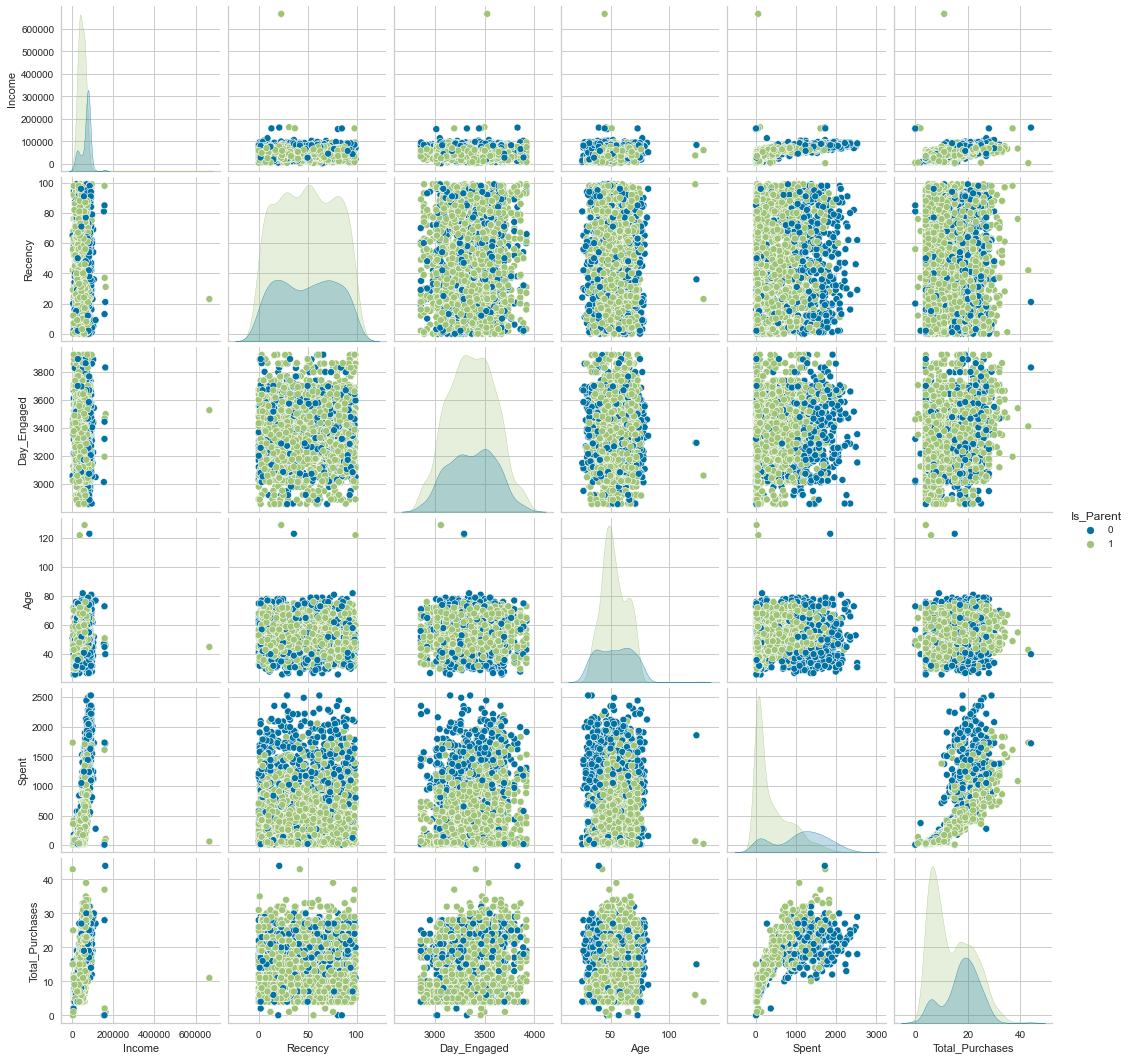

In [23]:
#To plot some selected features 
#Plotting following features
To_Plot = [ "Income", "Recency", "Day_Engaged", "Age", "Spent", "Is_Parent", "Total_Purchases"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(cust[To_Plot], hue= "Is_Parent")
#Taking hue 
plt.show()

#### Note:
1. **Total_Purchases** has a positive correlation with **Income**, which states as the income increases, people will buy more.
1. **Spent** has a positive correlation with **Income**
2. **Spent** has a positive correlation with **Total_Purchases**, of course, as you buy more, you spent more.

In [24]:
#Dropping the outliers by setting a cap on Age and income. 
cust = cust[(cust["Age"]<90)]
cust = cust[(cust["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(cust))

The total number of data-points after removing the outliers are: 2212


<AxesSubplot:>

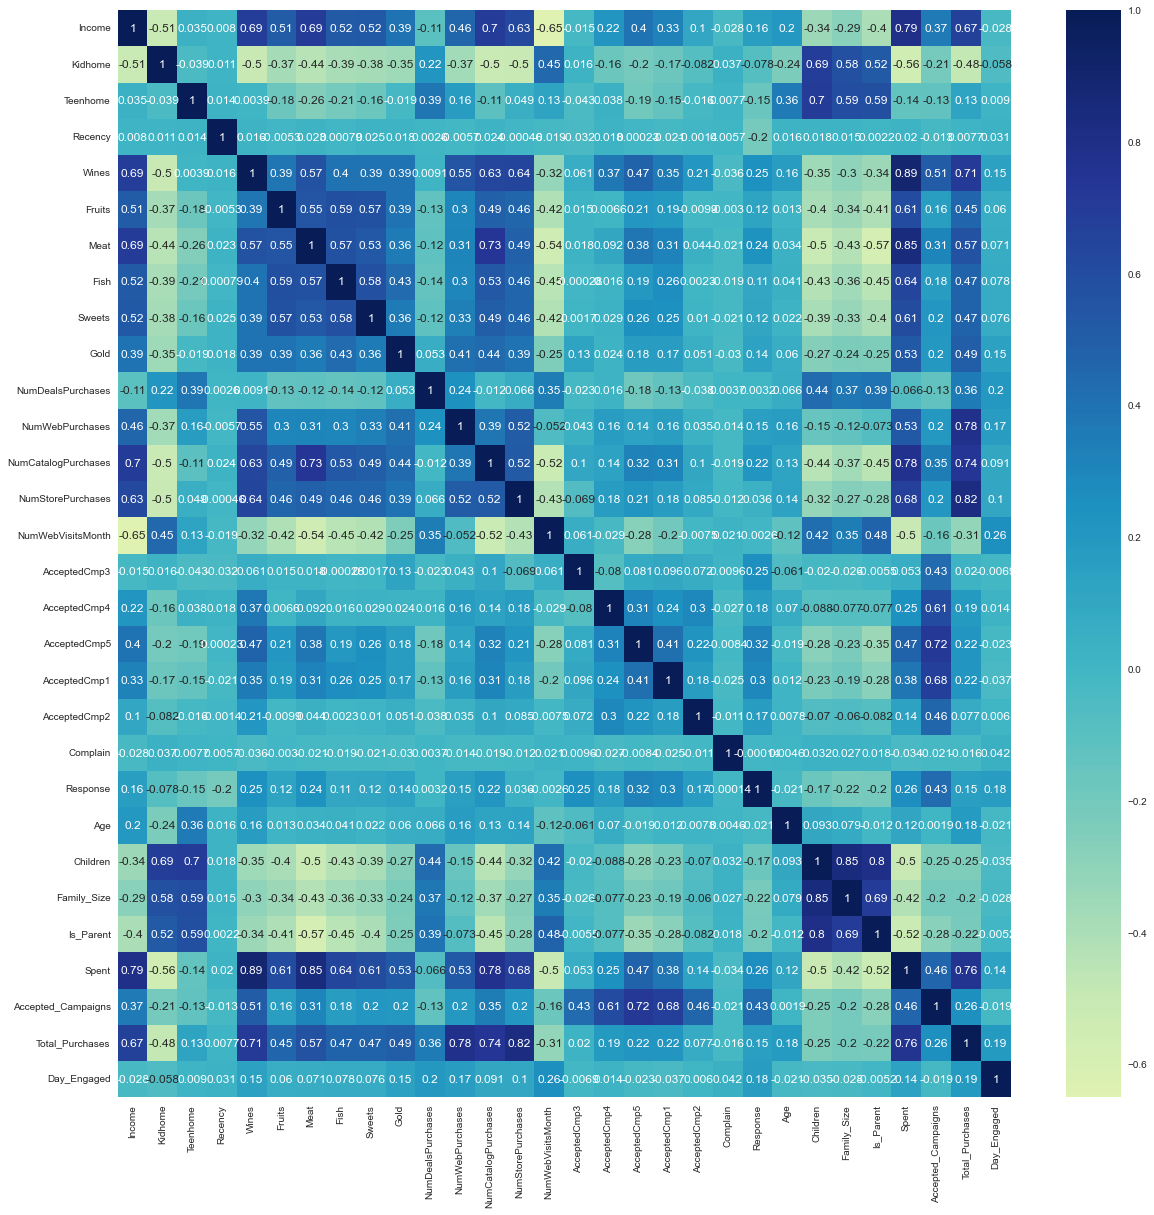

In [25]:
#correlation matrix
corrmat= cust.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat,annot=True, cmap="YlGnBu", center=0)

#### The following steps are applied to preprocess the data:

1. Label encoding the categorical features
2. Scaling the features using the standard scaler
3. Creating a subset dataframe for dimensionality reduction

In [26]:
# get list of categorical columns
ds= cust.copy()

categorical_cols = list((ds.dtypes == 'object')[(ds.dtypes == 'object')].index)

# Label Encoding
le=LabelEncoder()
for i in categorical_cols:
    ds[i]=ds[[i]].apply(le.fit_transform)

In [27]:
ds.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Children', 'Family_Size', 'Is_Parent',
       'Spent', 'Accepted_Campaigns', 'Total_Purchases', 'Day_Engaged'],
      dtype='object')

In [28]:
#2.Scaling Features with StandardScaler
cols_del = ['Marital_Status',
            'Teenhome',
            "Kidhome",
            'AcceptedCmp3',
            'AcceptedCmp4',
            'AcceptedCmp5',
            'AcceptedCmp1',
            'AcceptedCmp2',
            'Complain',
            'Response']

ds = ds.drop(cols_del, axis=1)

In [29]:
scaler = StandardScaler()
scaler.fit(ds)

scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)

In [30]:
scaled_ds.head()

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Children,Family_Size,Is_Parent,Spent,Accepted_Campaigns,Total_Purchases,Day_Engaged
0,-0.89,0.29,0.31,0.98,1.55,1.69,2.45,1.48,0.85,0.35,1.43,2.50,-0.56,0.69,1.02,-1.26,-1.76,-1.58,1.68,-0.44,1.32,1.97
1,-0.89,-0.26,-0.38,-0.87,-0.64,-0.72,-0.65,-0.63,-0.73,-0.17,-1.13,-0.57,-1.17,-0.13,1.27,1.40,0.45,0.63,-0.96,-0.44,-1.16,-1.67
2,-0.89,0.91,-0.80,0.36,0.57,-0.18,1.34,-0.15,-0.04,-0.69,1.43,-0.23,1.29,-0.54,0.33,-1.26,-0.65,-1.58,0.28,-0.44,0.80,-0.17
3,-0.89,-1.18,-0.80,-0.87,-0.56,-0.66,-0.50,-0.59,-0.75,-0.17,-0.76,-0.91,-0.56,0.28,-1.29,0.07,0.45,0.63,-0.92,-0.44,-0.90,-1.92
4,0.57,0.29,1.55,-0.39,0.42,-0.22,0.15,-0.00,-0.56,1.39,0.33,0.11,0.06,-0.13,-1.03,0.07,0.45,0.63,-0.31,-0.44,0.54,-0.82


## Dimensionality Reduction

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**

- Dimensionality reduction with PCA
- Plotting the reduced dataframe

**Dimensionality reduction with PCA**

For this project, I will be reducing the dimensions to 3.

In [31]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.00,-0.00,2.91,-5.37,-2.66,-0.77,2.50,8.11
col2,2212.00,0.00,1.63,-4.29,-1.16,-0.22,1.08,6.57
col3,2212.00,0.00,1.17,-3.73,-0.82,-0.01,0.78,6.06


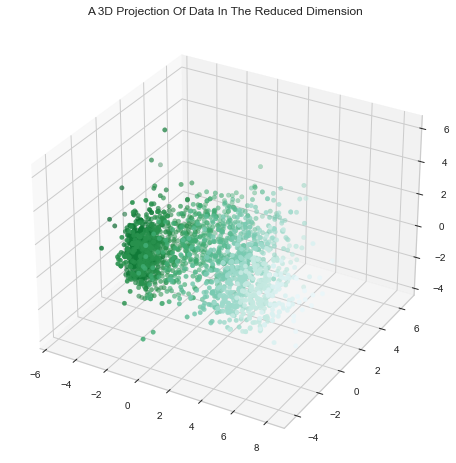

In [32]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
cmap = ListedColormap(sns.color_palette("BuGn_r", 10).as_hex())
ax.scatter(x,y,z, c=x, marker="o", cmap = cmap)
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## Clustering

#### Steps involved in the Clustering

1. Elbow Method to determine the number of clusters to be formed
2. Clustering via Agglomerative Clustering
3. Examining the clusters formed via scatter plot

Elbow Method to determine the number of clusters to be formed:


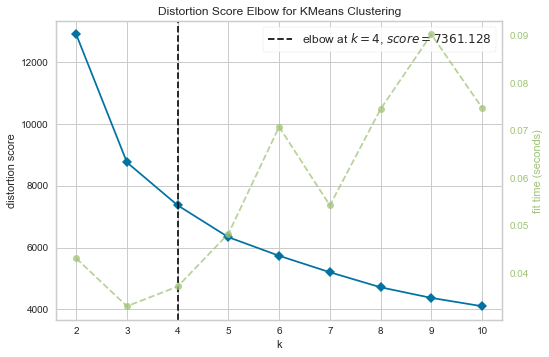

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

We could know that the best k for K-Means Clustering is k = 4.

### KMeans

- K-Means is fast, easy to understand, and available everywhere. It isn’t a clustering algorithm, it is a partitioning algorithm. That is to say K-means doesn’t ‘find clusters’ it partitions your dataset into as many (assumed to be globular) chunks as you ask for by attempting to minimize intra-partition distances.

- You need to specify exactly how many clusters you expect. The another problem is K-Means dependents upon initialization; give it multiple different random starts and you can get multiple different clusterings. This does not engender much confidence in any individual clustering that may result.

In [34]:
#Initiating the K-Means Clustering model 
KM = KMeans(n_clusters=4)
# fit model and predict clusters
yhat_KM = KM.fit_predict(PCA_ds)
PCA_ds["KMeans"] = yhat_KM
#Adding the Clusters feature to the orignal dataframe.
cust["KMeans"]= yhat_KM

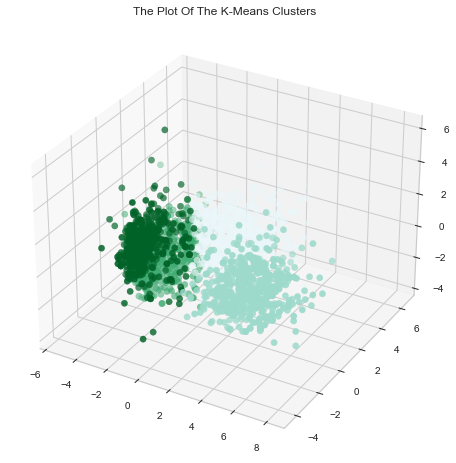

In [35]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["KMeans"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The K-Means Clusters")
plt.show()

### Agglomerative Clustering

- The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram.

In [36]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["AgglomerativeClustering"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
cust["AgglomerativeClustering"]= yhat_AC

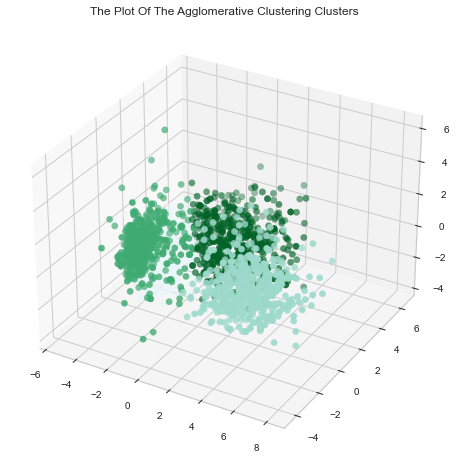

In [37]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["AgglomerativeClustering"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Agglomerative Clustering Clusters")
plt.show()

Kmeans and Agglomerative Clustering show simular clusters, groupes found by Spectral Clustering differs. It is hard to determine some clusters due to high density, not all algorithms show reasonable results.

### Spectral Clustering

- Spectral clustering is another graph-based approach which is flexible and allows us to cluster non graph data as well.

- It helps us overcome two major problems in clustering: one being the shape of the cluster and the other is determining the cluster centroid.

- K-means generally assumes that the clusters are spherical or round within k-radius from the cluster centroid. In K means, many iterations are required to determine the cluster centroid. In spectral, the clusters do not follow a fixed shape or pattern. Points that are far away but connected belong to the same cluster and the points which are less distant from each other could belong to different clusters if they are not connected. This implies that the algorithm could be effective for data of different shapes and sizes.

- it is computationally fast for sparse datasets of several thousand data points.

In [38]:
#Initiating the Spectral Clustering model 
S = cluster.SpectralClustering(n_clusters=4)
# fit model and predict clusters
yhat_S = S.fit_predict(PCA_ds)
PCA_ds["SpectralClustering"] = yhat_S
#Adding the Clusters feature to the orignal dataframe.
cust["SpectralClustering"]= yhat_S

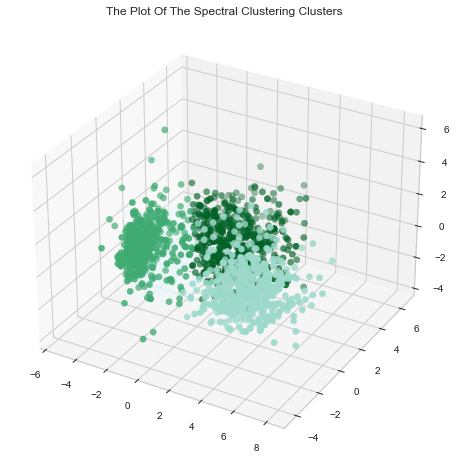

In [39]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["SpectralClustering"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Spectral Clustering Clusters")
plt.show()

### MeanShift

- It is a centroid-based, like K-Means and Affinity Propagation.

- It is also known as the Mode-seeking algorithm, assigns the data points to the clusters iteratively by shifting points towards the mode (mode is the highest density of data points in the region, in the context of the Meanshift).

- Unlike K-Means cluster algorithm, mean-shift does not require specifying the number of clusters in advance. The number of clusters is determined by the algorithm with respect to the data.

In [40]:
#Initiating the MeanShift Clustering model 
MS = cluster.MeanShift()
# fit model and predict clusters
yhat_MS = S.fit_predict(PCA_ds)
PCA_ds["MeanShift"] = yhat_MS
#Adding the Clusters feature to the orignal dataframe.
cust["MeanShift"]= yhat_MS

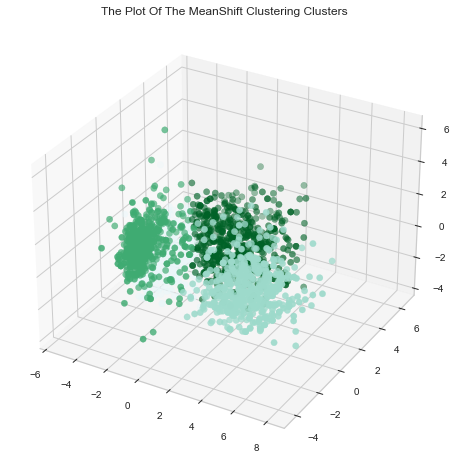

In [41]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["MeanShift"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The MeanShift Clustering Clusters")
plt.show()

We can see from the 3D plot that MeanShift has a very similar clustering output with KMeans and Agglomerative Clustering Methods.

### DBSCAN

- DBSCAN is a density-based clustering algorithm. When it comes to arbitrary shaped clusters or detecting outliers, density-based techniques are more efficient. It is able to find arbitrary shaped clusters and clusters with noise。

- The end result is a set of cluster ‘exemplars’ from which we derive clusters by essentially doing what K-Means does and assigning each point to the cluster of it’s nearest exemplar. Affinity Propagation has some advantages over K-Means.

In [42]:
#Initiating the DBSCAN Clustering model 
DBSCAN = cluster.DBSCAN()
# fit model and predict clusters
yhat_DBSCAN = DBSCAN.fit_predict(PCA_ds)
PCA_ds["DBSCAN"] = yhat_DBSCAN
#Adding the Clusters feature to the orignal dataframe.
cust["DBSCAN"]= yhat_DBSCAN

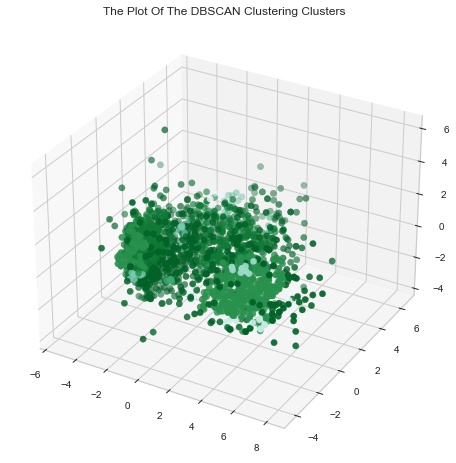

In [43]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["DBSCAN"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The DBSCAN Clustering Clusters")
plt.show()

DBSCAN does not work very well in this case since it could not handle the boundary cases properly and output too many clusters.

### Affinity Propagation

- It is a graph-based approach, each data point sends messages to all other points informing its targets of each target’s relative attractiveness to the sender. Each target then responds to all senders with a reply informing each sender of its availability to associate with the sender, given the attractiveness of the messages that it has received from all other senders. Senders reply to the targets with messages informing each target of the target’s revised relative attractiveness to the sender, given the availability messages it has received from all targets. The message-passing procedure proceeds until a consensus is reached. Once the sender is associated with one of its targets, that target becomes the point’s exemplar. All points with the same exemplar are placed in the same cluster.

- It does not require to specify the number of clusters.

- Affinity Propagation has some advantages over K-Means.

In [44]:
#Initiating the AffinityPropagation Clustering model 
AP = cluster.AffinityPropagation()
# fit model and predict clusters
yhat_AP = AP.fit_predict(PCA_ds)
PCA_ds["AP"] = yhat_AP
#Adding the Clusters feature to the orignal dataframe.
cust["AP"]= yhat_AP

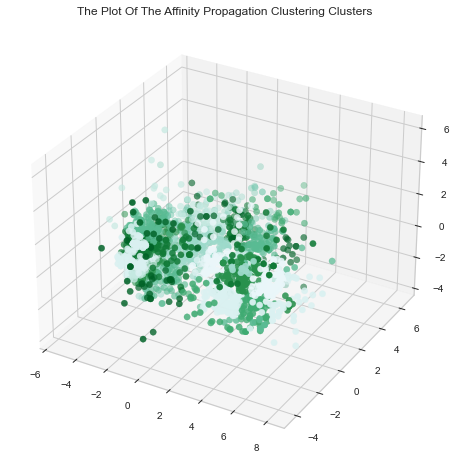

In [45]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["AP"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Affinity Propagation Clustering Clusters")
plt.show()

Like DBSCAN, Affinity Propagation does not perform very well over K-Means or Agglomerative Clustering. The cluster is saperated with very low density.

## Model Evaluation

Due to the poor performance of **DBSCAN** and **Affinity Propagation**, we may only evaluate **K-Means**, **Agglomerative Clustering**, **Spectral Clustering** and **MeanShift** in this case.

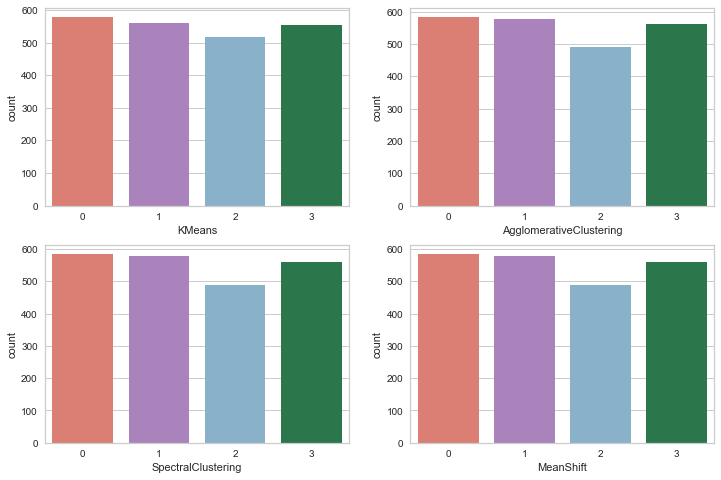

In [46]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(x=cust["KMeans"], palette= colors)
plt.subplot(2,2,2)
sns.countplot(x=cust["AgglomerativeClustering"], palette= colors)
plt.subplot(2,2,3)
sns.countplot(x=cust["SpectralClustering"], palette= colors)
plt.subplot(2,2,4)
sns.countplot(x=cust["MeanShift"], palette= colors)

plt.show()

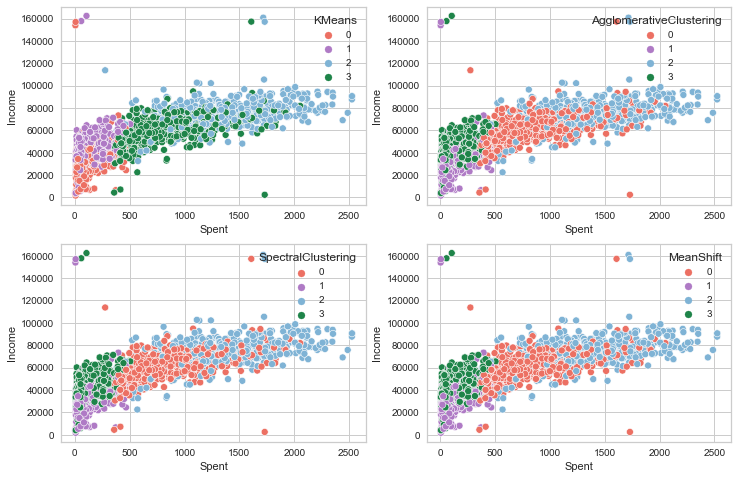

In [47]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.scatterplot(data=cust, x=cust['Spent'], y=cust["Income"],hue=cust["KMeans"],palette=sns.color_palette(colors))
plt.subplot(2,2,2)
sns.scatterplot(data=cust,x=cust["Spent"], y=cust["Income"],hue=cust["AgglomerativeClustering"], palette=sns.color_palette(colors))
plt.subplot(2,2,3)
sns.scatterplot(data=cust, x=cust['Spent'], y=cust["Income"],hue=cust["SpectralClustering"],palette=sns.color_palette(colors))
plt.subplot(2,2,4)
sns.scatterplot(data=cust, x=cust['Spent'], y=cust["Income"],hue=cust["MeanShift"],palette=sns.color_palette(colors))

plt.show()

As we can see distribution of clusters for K-Means, the clusters seem to be fairly distributed and I would choose to take the K-Means result among the 4 clustering methods.

## Profiling

<AxesSubplot:xlabel='Spent', ylabel='Income'>

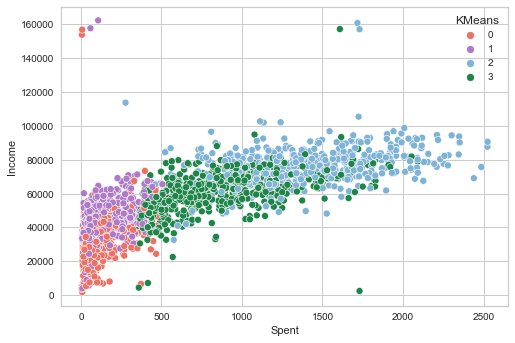

In [48]:
sns.scatterplot(data=cust, x=cust['Spent'], y=cust["Income"],hue=cust["KMeans"],palette=sns.color_palette(colors))

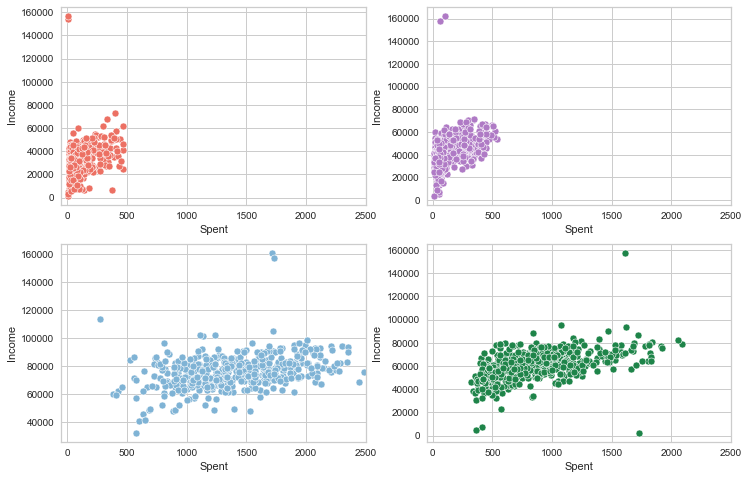

In [49]:
customer_groups = cust["KMeans"].unique().tolist()
customer_groups.sort()
plt.figure(figsize=(12,8))

# for i, group in enumerate(customer_groups): #enumerate here to get access to i
#     plot_data = cust[cust.KMeans == group]
#     plt.subplot(2,2,i+1)
#     sns.scatterplot(x=plot_data["Spent"], y=plot_data["Income"], palette=sns.color_palette(colors))

plt.subplot(2,2,1)
type0 = sns.scatterplot(data=cust, x=cust['Spent'], y=cust[cust.KMeans == 0]["Income"], color = "#EC7063")
type0.set_xlim(-50,2500)
plt.subplot(2,2,2)
type1 = sns.scatterplot(data=cust,x=cust["Spent"], y=cust[cust.KMeans == 1]["Income"], color = "#AF7AC5")
type1.set_xlim(-50,2500)
plt.subplot(2,2,3)
type2 = sns.scatterplot(data=cust, x=cust['Spent'], y=cust[cust.KMeans == 2]["Income"], color = "#7FB3D5")
type2.set_xlim(-50,2500)
plt.subplot(2,2,4)
type3 = sns.scatterplot(data=cust, x=cust['Spent'], y=cust[cust.KMeans == 3]["Income"], color = "#1E8449")
type3.set_xlim(-50,2500)

plt.show()

#### Observation:

- group 0 & group 1: low spending & low income, Typically spent under 500.
- group 2: high spending & high income
- group 3: high spending & average income

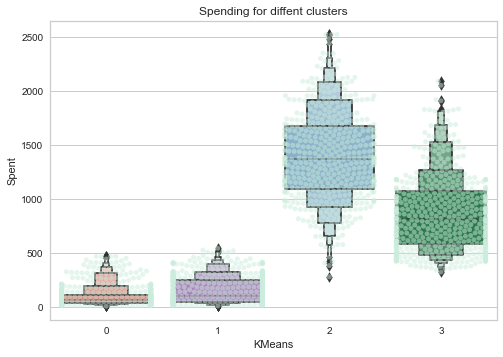

In [50]:
plt.figure()
pl=sns.swarmplot(x=cust["KMeans"], y=cust["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=cust["KMeans"], y=cust["Spent"], palette=colors)
pl.set_title("Spending for diffent clusters")
plt.show()

From the above plot, it can be clearly seen that cluster 2 is our biggest set of customers closely followed by cluster 3. We can explore what each cluster is spending on for the targeted marketing strategies.

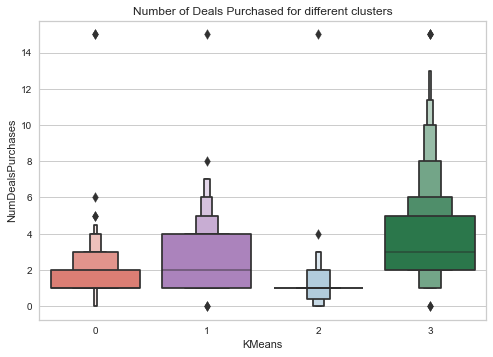

In [51]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(x=cust["KMeans"],y=cust["NumDealsPurchases"], palette=colors)
pl.set_title("Number of Deals Purchased for different clusters")
plt.show()

- Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and cluster 3. However, our star customers cluster 2 are not much into the deals. 

- Promotion seems not so attractive cluster 2, But cluster 3 set of customer tends to spend more on the promotion deals. Promotions could target cluster 3 to gain the best promotion result.

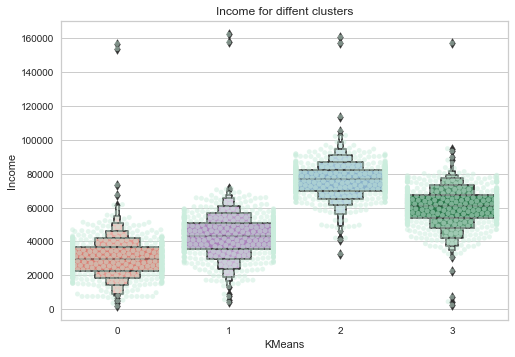

In [52]:
plt.figure()
pl=sns.swarmplot(x=cust["KMeans"], y=cust["Income"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=cust["KMeans"], y=cust["Income"], palette=colors)
pl.set_title("Income for diffent clusters")
plt.show()

It can be seen that cluster 2 set of customers have the highest income among the whole sample set. cluster 3 set of customers got an average income. Meanwhile, cluster 0 and cluster 1 customers only get no more than 40,000 a year, which could be considered as low income.

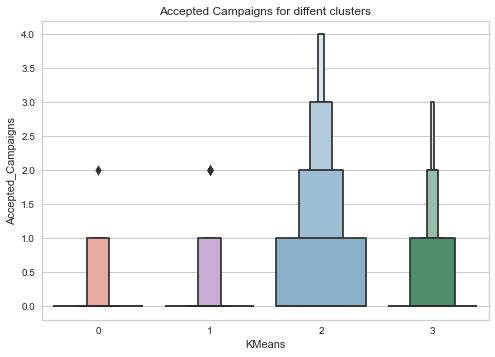

In [53]:
#Plotting count of total campaign accepted.
plt.figure()
pl=sns.boxenplot(x=cust["KMeans"], y=cust["Accepted_Campaigns"], palette=colors)
pl.set_title("Accepted Campaigns for diffent clusters")
plt.show()

- Although cluster 2 set of customers is not so attractive to promotion deals, but cluster 2 customers have the highest potention to complete purchases.
- Cluster 0 and cluster 2 people nearly not accept campaigns.
- Cluster 3 people are willing to accept campaign goals.

<Figure size 576x396 with 0 Axes>

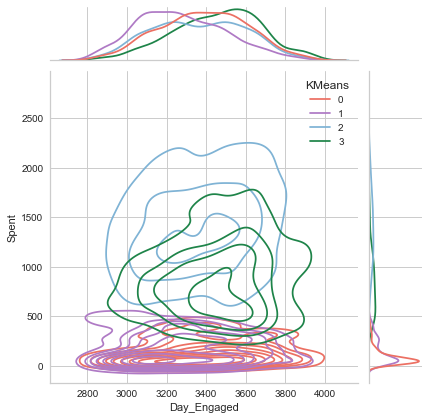

<Figure size 576x396 with 0 Axes>

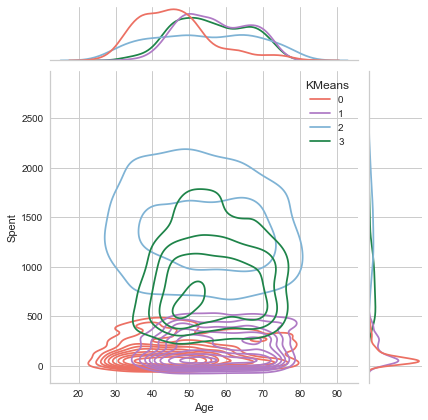

<Figure size 576x396 with 0 Axes>

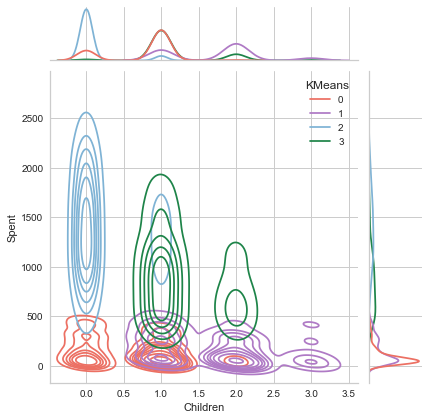

<Figure size 576x396 with 0 Axes>

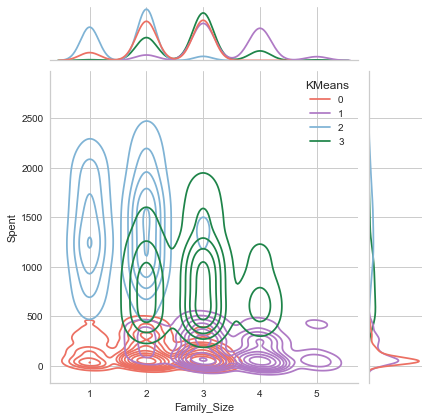

<Figure size 576x396 with 0 Axes>

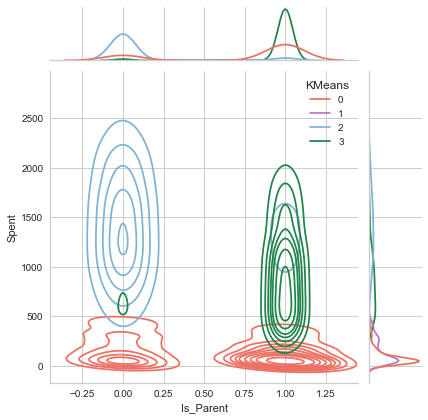

In [54]:
Personal = ["Day_Engaged", "Age", "Children", "Family_Size", "Is_Parent"]

for i in range(len(Personal)):
    plt.figure()
    sns.jointplot(x=cust[Personal[i]], y=cust["Spent"], hue =cust["KMeans"], kind="kde", palette=colors)
    plt.show()

In [55]:
summary_df = cust.groupby(["KMeans"]).agg({"Education":"count","Age":np.mean,"Income":np.median,"Family_Size":np.mean, "Spent":np.median,
                                                                        "NumDealsPurchases":np.mean, "Day_Engaged":np.median}).reset_index().rename(columns={"Education":"Customer count"})

summary_df.round()

,KMeans,Customer count,Age,Income,Family_Size,Spent,NumDealsPurchases,Day_Engaged
0,0,578,46.00,29878.00,2.00,60.00,2.00,3391.00
1,1,561,57.00,43456.00,3.00,96.00,3.00,3254.00
2,2,519,54.00,76773.00,2.00,1366.00,1.00,3355.00
3,3,554,56.00,61202.00,3.00,814.00,4.00,3477.00


**Cluster 0**

- Include 578 customers.
- Low income.
- Not a parent (at max 2 members in the house).
- Low spending.
- Secondary target audience for deals.

**Cluster 1**

- Includes 561 customers.
- Low income, as the cluster 1.
- Mostly parents (at the max 5 members in the family, and at least 2).
- Low spending.
- Relatively new customers for company.
- Primary target audience for deals.

**Cluster 2**

- Includes 519 customers.
- Relatively older than cluster 0.
- Not a parent (at the max 2 members in the house).
- Top spending segment.
- Highest income.
- Habit of shopping from both web and catalog.
- Relatively new customers for company.
- Target audience for online campaings.

**Cluster 3**

- second most populous segment (554 customers).
- Mostly parents (at the max 5 members in the family, and at least 2).
- Relatively older than other segments.
- Loyal customers for the company.
- Habit of shopping from web.
- High income.
- High spending.
- Primary target audience for online campaigns.